<a href="https://colab.research.google.com/github/kcat28/CCADMACL_EXERCISES_COM222ML/blob/main/ADML_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Use all feature selection methods to find the best features

## Dataset Information

## Features

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

## Target
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [499]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

corr_with_label = 0.05  #correlation threshold for target
corr_between_features = 0.65 #correlation threshold between features


In [500]:
housing = fetch_california_housing(as_frame=True)
df = pd.concat([housing.data, housing.target], axis=1)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [502]:
df.duplicated().sum()

0

In [503]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [504]:
df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2097,1.2101,40.0,3.978218,1.027723,2219.0,4.394059,36.76,-119.77,0.491
16510,3.4426,7.0,5.416393,1.028415,3006.0,3.285246,37.73,-121.16,1.390
18020,6.0957,32.0,5.505976,0.952191,705.0,2.808765,37.24,-121.95,4.054


1. Use any filter method to select the best features

#Pearson Correlation

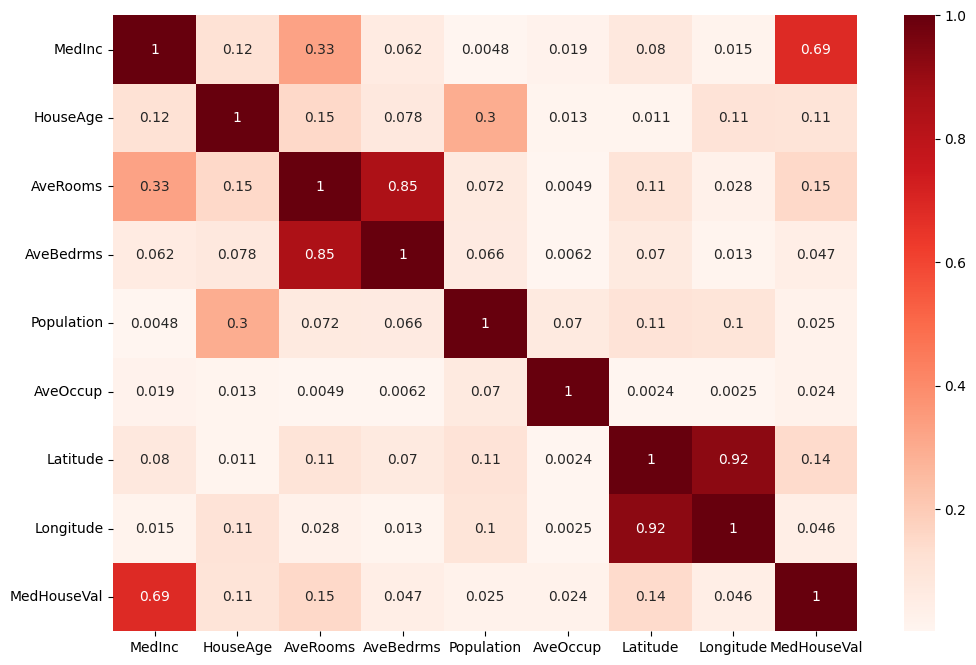

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64
filtermethod1 columns: Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude'], dtype='object')


In [505]:
# put your answer here
cor = df.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

medhouseval_corr = cor["MedHouseVal"].sort_values(ascending=False)
print(medhouseval_corr)

upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > corr_between_features)]
filtermethod1 = df.drop(to_drop, axis=1)
filtermethod1 = filtermethod1[[col for col in filtermethod1.columns if col != 'MedHouseVal']]
print('filtermethod1 columns:', filtermethod1.columns)

In [506]:
score_list = {}

In [507]:
X = filtermethod1
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [508]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
lr_score = LRmodel.score(X_test,y_test)
print(f"Score is {lr_score}")

Score is 0.5180302723872474


In [509]:
y_pred_train = LRmodel.predict(X_train)
y_pred_test = LRmodel.predict(X_test)

In [510]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Testing MSE: {mse_test}')
print(f'Training R2: {r2_train}')
print(f'Testing R2: {r2_test}')

Training MSE: 0.6317547994892553
Testing MSE: 0.6653777570027621
Training R2: 0.5210520096236764
Testing R2: 0.5180302723872474


In [511]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth=4, random_state = 42)
RFmodel.fit(X_train, y_train)
rf_score = RFmodel.score(X_test,y_test)
print(f"Score is {rf_score}")
score_list["Filter Method"] = rf_score

Score is 0.5893359834299887


#Mutual_info_classif


In [512]:
from sklearn.feature_selection import mutual_info_regression
threshold = 5  # the number of most relevant features
high_score_features = []

mifX = df.drop('MedHouseVal', axis=1)
mify = df['MedHouseVal']

feature_scores = mutual_info_regression(mifX, mify, random_state=0)

feature_scores_df = pd.DataFrame({'Feature': mifX.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print(feature_scores_df)

      Feature     Score
7   Longitude  0.401820
0      MedInc  0.387646
6    Latitude  0.370657
2    AveRooms  0.103623
5    AveOccup  0.072549
1    HouseAge  0.032114
3   AveBedrms  0.024482
4  Population  0.021994


In [513]:
filtermethod2 = feature_scores_df[feature_scores_df['Score'] > 0.3]['Feature'].tolist()
print(f"Selected features: {filtermethod2}")

Selected features: ['Longitude', 'MedInc', 'Latitude']


In [514]:
X = df[filtermethod2]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [515]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth=4, random_state = 42)
RFmodel.fit(X_train, y_train)
rf_score_mif = RFmodel.score(X_test,y_test)
print(f"Score is {rf_score_mif}")

Score is 0.5631589434197423


2. Use any wrapper method to select the best features

In [516]:
# put your answer here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1) # top 5 features
selector = selector.fit(mifX, mify)

selected_features = mifX.columns[selector.support_]
print(f"Selected features using RFE: {selected_features}")


X_selected = mifX[selected_features]


Selected features using RFE: Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


In [517]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, mify, test_size=0.2, random_state=40)

In [518]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth=4, random_state = 42)
RFmodel.fit(X_train, y_train)
rf_score_wrap = RFmodel.score(X_test,y_test)
print(f"Score is {rf_score_wrap}")
score_list["Wrapper Method"] = rf_score_wrap

Score is 0.5504939847808097


3. Use any embedded methood to select the best features

In [519]:
# put your answer here
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(alpha=0.01)

X_train, X_test, y_train, y_test = train_test_split(X_selected, mify, test_size=0.2, random_state=40)
lasso.fit(X_train, y_train)

selector = SelectFromModel(lasso)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

y_pred = lasso.predict(X_test_selected)
print(f"Selected features using Lasso: {selected_features}")
score = r2_score(y_test, y_pred)
print(f"R-squared score: {score}")

score_list["Embedded Method"] = score


Selected features using Lasso: Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')
R-squared score: 0.586975707586965


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


#general (all features)

In [520]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [521]:
RFmodel = RandomForestRegressor(n_estimators = 100, max_depth=4, random_state = 42)
RFmodel.fit(X_train, y_train)
rf_score_general = RFmodel.score(X_test, y_test)
print(f"Score is {rf_score_general}")
score_list["All Features Method"] = rf_score_general

Score is 0.5901310129798477


#compareAll

In [522]:
score_list = list(score_list.items())
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

Filter Method Score is 0.58 
Wrapper Method Score is 0.55 
Embedded Method Score is 0.58 
All Features Method Score is 0.59 
